In [16]:
import os
os.chdir("../")
from utils import *
os.chdir("test_pop_ini")

In [61]:
def vs_all(P):
    A=np.zeros((len(P),len(P)))
    for id_i,i in enumerate(P):
        for id_j,j in enumerate(P):
            A[id_i][id_j]=np.linalg.norm(abs(i-j))
    return A.mean(),A.std()

In [62]:
def bin_fixed(individuals,gens):
    M=np.random.randint(2,size=(individuals,gens))
    
       
    return (np.random.rand(individuals,gens)<0.5)*1#M
def uniform(individuals,gens):
    M=((np.random.rand(gens,individuals) < np.random.rand(individuals))*1).T
    
    unq, ind_unq= np.unique(M, axis=0,return_index=True)
    M=M[np.sort(ind_unq)]
    while len(M) < individuals:
        N=((np.random.rand(gens,individuals-len(M)) < np.random.rand(individuals-len(M)))*1).T
        M=np.concatenate((M,N))
        unq, ind_unq= np.unique(M, axis=0,return_index=True)
        M=M[np.sort(ind_unq)]
        
    return M

def k_random(individuals,gens):
    k=[round(np.random.rand()*gens) for i in range(individuals)]
    a=[np.random.choice(np.arange(gens),size=i,replace=False) for i in k]
    P=np.zeros((individuals,gens))
    for i,j in zip(P,a):
        i[j]=1
    return P.astype(int)

def p_bin(individuals,gens):
    
    
    def generate_individual(gens,p=None):
        if not p :
            p=np.random.rand()        
        individual=np.ndarray.tolist(np.random.binomial(n=1,p=p,size=gens))        
        return np.array(individual)
    
    P=np.zeros((individuals,gens))
    for i in range(individuals):
        ind=generate_individual(gens)
        P[i]=ind

    unq, ind_unq= np.unique(P, axis=0,return_index=True)

    while len(unq) < individuals:
        for i in set(np.arange(individuals))-set(ind_unq):
            ind=generate_individual(gens)
            P[i]=ind
        unq, ind_unq= np.unique(P, axis=0,return_index=True)

    return P.astype(int)


10.083 2.225783232931725


(3.13810420183386, 0.37498269084408303)

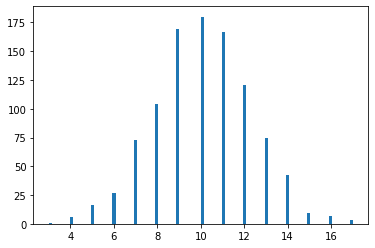

In [63]:
P=bin_fixed(1000,20)
#A=np.array([int(''.join([str(i) for i in individual]),2)/int(''.join([str(1) for i in range(len(individual))]),2) for individual in P])
A=P.sum(axis=1)
plt.hist(A,bins=100)
print(A.mean(),A.std())
vs_all(P)

10.125 5.0163108954689


(3.1189710561507598, 0.513199328617862)

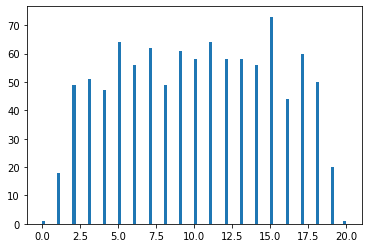

In [64]:
P=uniform(1000,20)
#A=np.array([int(''.join([str(i) for i in individual]),2)/int(''.join([str(1) for i in range(len(individual))]),2) for individual in P])
A=P.sum(axis=1)
plt.hist(A,bins=100)
print(A.mean(),A.std())
vs_all(P)

965.491 583.8956447165881


(31.03362430041758, 5.919373681440601)

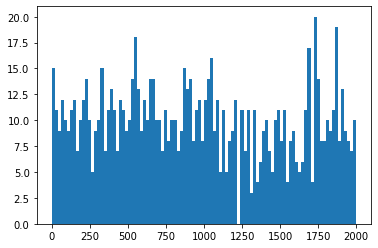

In [65]:
P=p_bin(1000,2000)
#A=np.array([int(''.join([str(i) for i in individual]),2)/int(''.join([str(1) for i in range(len(individual))]),2) for individual in P])
A=P.sum(axis=1)
plt.hist(A,bins=100)
print(A.mean(),A.std())
vs_all(P)

983.248 572.3579356451695


(31.094054148009704, 5.674806132427875)

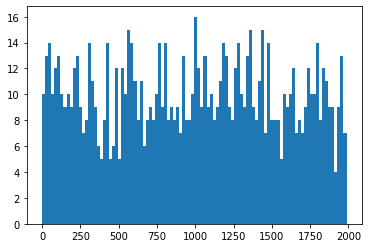

In [7]:
P=k_random(1000,2000)
#A=np.array([int(''.join([str(i) for i in individual]),2)/int(''.join([str(1) for i in range(len(individual))]),2) for individual in P])
A=P.sum(axis=1)
plt.hist(A,bins=100)
print(A.mean(),A.std())
vs_all(P)

(999.5, 577.3501970208376)

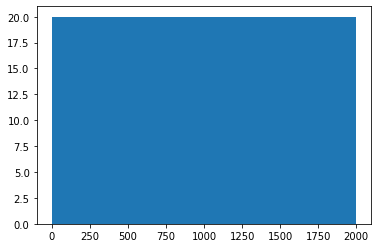

In [8]:
A=np.arange(2000)
plt.hist(A,bins=100)
A.mean(),A.std()

(1035.55, 580.149731965809)

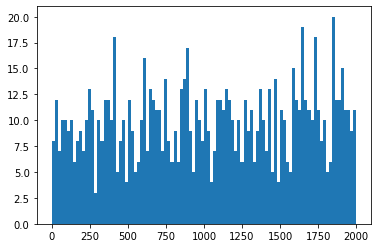

In [9]:
A=np.around(np.random.rand(1000)*2000)
plt.hist(A,bins=100)
A.mean(),A.std()

In [10]:
from test_pop_ini import *

2491.705 1348.5920622912622
2593.355 1380.5544896797808
2474.7425 36.5178886814394


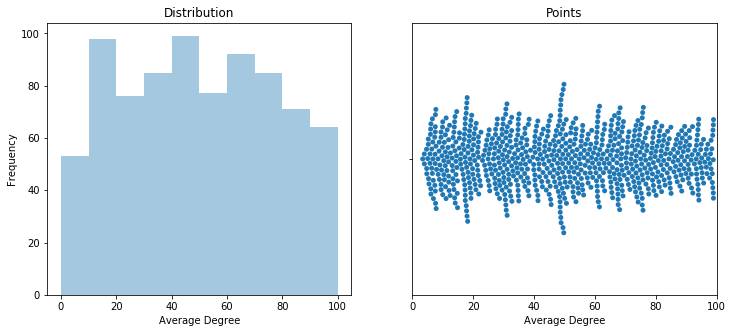

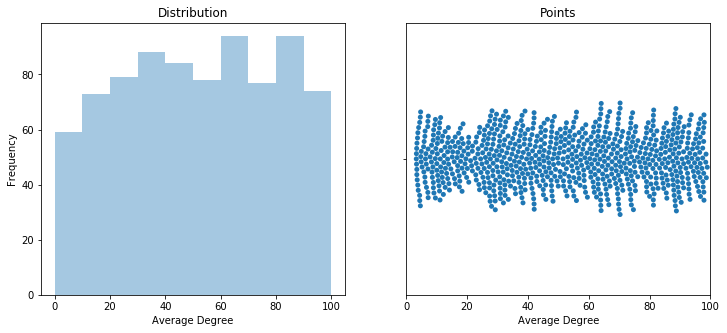

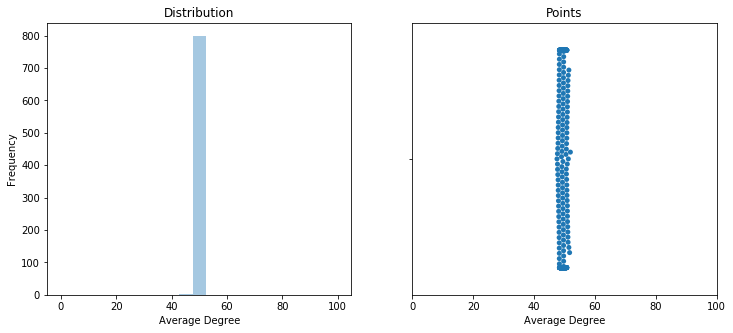

In [11]:
test(saves=["binomial_trick.pdf","binomial.pdf","random_int.pdf"])